Epoch 1, Train Accuracy: 0.6567, Train Loss: 1.3644
Epoch 1, Test Accuracy: 0.8476, Test Loss: 0.6649
Epoch 2, Train Accuracy: 0.8638, Train Loss: 0.5405
Epoch 2, Test Accuracy: 0.8845, Test Loss: 0.4401
Epoch 3, Train Accuracy: 0.8867, Train Loss: 0.4157
Epoch 3, Test Accuracy: 0.8971, Test Loss: 0.3684
Epoch 4, Train Accuracy: 0.8958, Train Loss: 0.3694
Epoch 4, Test Accuracy: 0.9048, Test Loss: 0.3384
Epoch 5, Train Accuracy: 0.9013, Train Loss: 0.3443
Epoch 5, Test Accuracy: 0.9091, Test Loss: 0.3209
Epoch 6, Train Accuracy: 0.9060, Train Loss: 0.3279
Epoch 6, Test Accuracy: 0.9108, Test Loss: 0.3068
Epoch 7, Train Accuracy: 0.9094, Train Loss: 0.3160
Epoch 7, Test Accuracy: 0.9134, Test Loss: 0.2982
Epoch 8, Train Accuracy: 0.9120, Train Loss: 0.3068
Epoch 8, Test Accuracy: 0.9154, Test Loss: 0.2941
Epoch 9, Train Accuracy: 0.9139, Train Loss: 0.2988
Epoch 9, Test Accuracy: 0.9186, Test Loss: 0.2844
Epoch 10, Train Accuracy: 0.9162, Train Loss: 0.2920
Epoch 10, Test Accuracy: 0.91

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


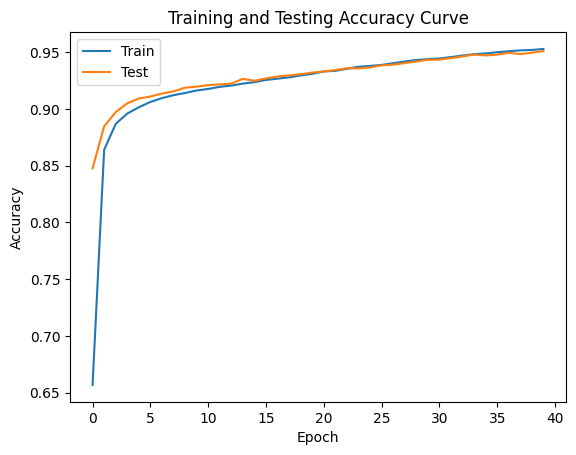

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


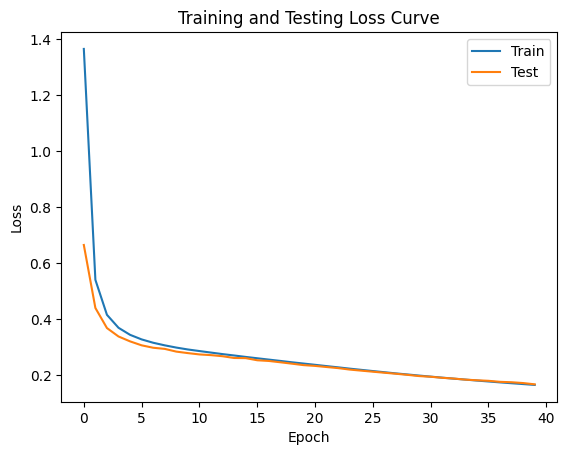

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Define the hyperparameters
d = 784 # input dimension
d1 = 300 # hidden dimension
k = 10 # output dimension
lr = 0.01 # learning rate
batch_size = 16 # batch size
epochs = 40 # number of epochs

# Define the model class using torch.nn.Module
class NeuralNet(torch.nn.Module):
    def __init__(self, d, d1, k):
        super(NeuralNet, self).__init__()
        # Define the linear layers
        self.fc1 = torch.nn.Linear(d, d1)
        self.fc2 = torch.nn.Linear(d1, k)

    def forward(self, x):
        # Apply the sigmoid activation to the first layer
        x = torch.sigmoid(self.fc1(x))
        # Apply the softmax activation to the second layer
        x = self.fc2(x) # linear output layer
        return x

# Create an instance of the model
model = NeuralNet(d, d1, k)

# Define the loss function as cross entropy
criterion = torch.nn.CrossEntropyLoss()

# Define the optimizer as SGD without momentum
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Load the MNIST dataset and transform it into tensors
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

# Create data loaders for batching
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define lists to store the training and testing accuracy and loss
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

# Train the model using SGD without momentum
for epoch in range(epochs):
    # Initialize the training accuracy and loss for each epoch
    train_acc = 0
    train_loss = 0

    # Loop over the training batches
    for x, y in train_loader:
        # Flatten the input images
        x = x.view(-1, d)

        # Forward pass: compute the predicted outputs
        y_pred = model(x)

        # Compute the loss
        loss = criterion(y_pred, y)

        # Backward pass: compute the gradients using autograd
        loss.backward()

        # Update the parameters using SGD
        optimizer.step()

        # Zero the gradients for the next iteration
        optimizer.zero_grad()

        # Compute the accuracy
        y_pred_labels = torch.argmax(y_pred, dim=1)
        acc = torch.sum(y_pred_labels == y).item() / batch_size

        # Accumulate the accuracy and loss over the epoch
        train_acc += acc
        train_loss += loss.item()

    # Compute the average accuracy and loss over the epoch
    train_acc /= len(train_loader)
    train_loss /= len(train_loader)

    # Append the accuracy and loss to the lists
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)

    # Print the epoch summary
    print(f'Epoch {epoch+1}, Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}')

    # Initialize the testing accuracy and loss for each epoch
    test_acc = 0
    test_loss = 0

    # Loop over the testing batches
    for x, y in test_loader:
        # Flatten the input images
        x = x.view(-1, d)

        # Forward pass: compute the predicted outputs with no_grad to save memory and speed up computation
        with torch.no_grad():
            y_pred = model(x)

            # Compute the loss
            loss = criterion(y_pred, y)

            # Compute the accuracy
            y_pred_labels = torch.argmax(y_pred, dim=1)
            acc = torch.sum(y_pred_labels == y).item() / batch_size

            # Accumulate the accuracy and loss over the epoch
            test_acc += acc
            test_loss += loss.item()

    # Compute the average accuracy and loss over the epoch
    test_acc /= len(test_loader)
    test_loss /= len(test_loader)

    # Append the accuracy and loss to the lists
    test_acc_list.append(test_acc)
    test_loss_list.append(test_loss)

    # Print the epoch summary
    print(f'Epoch {epoch+1}, Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

# Plot the training and testing accuracy curve
plt.plot(train_acc_list, label='Train')
plt.plot(test_acc_list, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Curve')
plt.legend()
plt.savefig("accuracy_curve_Q43.eps")
plt.show()

# Plot the training and testing loss curve
plt.plot(train_loss_list, label='Train')
plt.plot(test_loss_list, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curve')
plt.legend()
plt.savefig("loss_curve_Q43.eps")
plt.show()
